In [2]:
from nilearn.interfaces.fmriprep import load_confounds_strategy

In [31]:
func_brain_mask = "/users2/local/alix/out/sub-xp201/func/sub-xp201_task-MIpost_space-MNI152NLin2009cAsym_res-2_desc-brain_mask.nii.gz"
func = "/users2/local/alix/out/sub-xp201/func/sub-xp201_task-MIpost_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz"
anat = "/users2/local/alix/out/sub-xp201/anat/sub-xp201_space-MNI152NLin2009cAsym_res-2_desc-preproc_T1w.json"
events = "/users2/local/alix/XP2/task-MIpost_events.tsv"

In [12]:
func = "/users2/local/alix/out/sub-001/func/sub-001_task-eegfmri_desc-preproc_bold.nii.gz"

In [32]:
confounds_GS, _  = load_confounds_strategy(func, "simple", global_signal="basic")


In [14]:
import pandas as pd

In [21]:
confounds_GS = pd.read_table("/users2/local/alix/out/sub-001/func/sub-001_task-fmri_desc-confounds_timeseries.tsv")

In [22]:
confounds_GS.columns

Index(['global_signal', 'global_signal_derivative1',
       'global_signal_derivative1_power2', 'global_signal_power2', 'csf',
       'csf_derivative1', 'csf_power2', 'csf_derivative1_power2',
       'white_matter', 'white_matter_derivative1',
       ...
       'rot_x_derivative1_power2', 'rot_y', 'rot_y_derivative1',
       'rot_y_derivative1_power2', 'rot_y_power2', 'rot_z',
       'rot_z_derivative1', 'rot_z_derivative1_power2', 'rot_z_power2',
       'motion_outlier00'],
      dtype='object', length=268)

In [16]:
import matplotlib.pyplot as plt
from scipy.signal import detrend
import numpy as np

In [25]:
GS = np.array(confounds_GS["global_signal"])
GS_detrend = detrend(GS)

CSF = np.array(confounds_GS["csf"])
CSF_detrend = detrend(CSF)

In [7]:
print(pearsonr(GS_detrend,CSF_detrend))

PearsonRResult(statistic=0.8386557922524274, pvalue=4.366158344945707e-89)


In [20]:
print(pearsonr(GS,CSF))

PearsonRResult(statistic=0.6429743447681231, pvalue=5.423620131805648e-35)


In [18]:
from scipy.stats import pearsonr

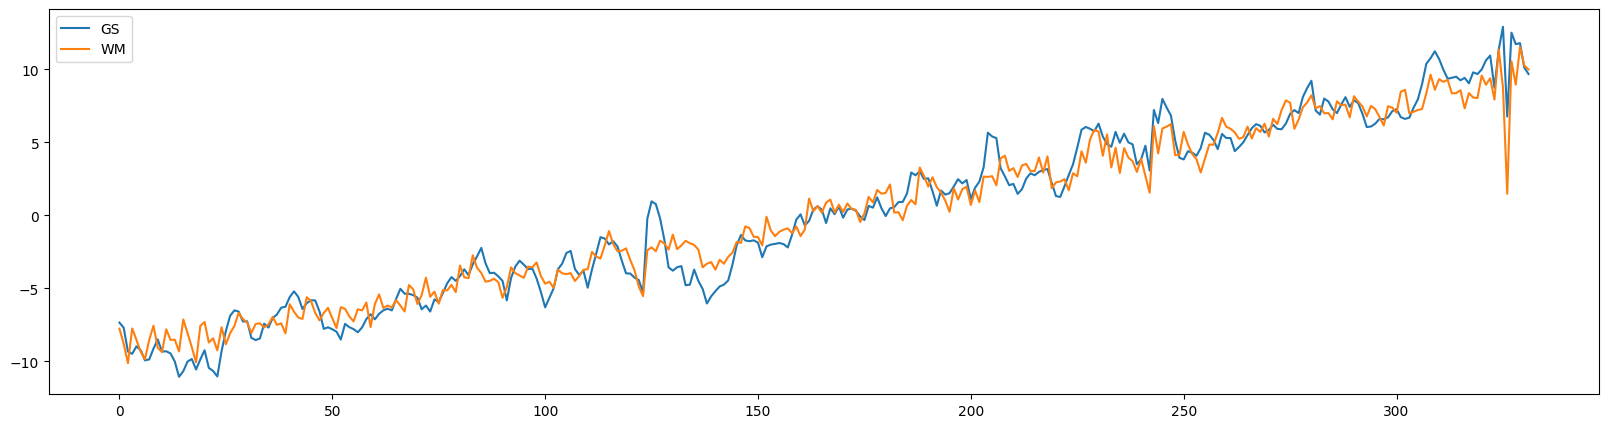

In [34]:
plt.figure(figsize = (20,5))
plt.plot(confounds_GS["global_signal"])
#plt.plot(CSF)
plt.plot(confounds_GS["white_matter"])
plt.legend(["GS", "WM"])
#plt.plot(confounds_GS["rot_z"])


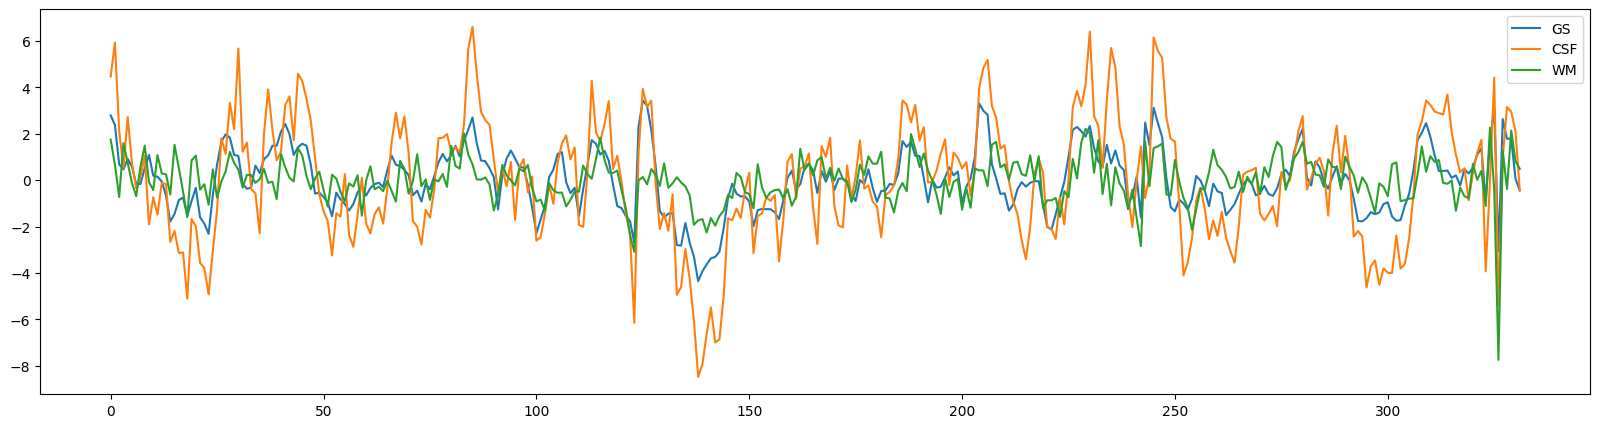

In [16]:
plt.figure(figsize = (20,5))
plt.plot(GS_detrend)
plt.plot(CSF_detrend)
plt.plot(detrend(confounds_GS["white_matter"]))
plt.legend(["GS", "CSF", "WM"])
#plt.plot(confounds_GS["rot_z"])

In [10]:
pearsonr(GS, detrend(confounds_GS["white_matter"]))

PearsonRResult(statistic=0.11509932333604933, pvalue=0.03605814034357787)

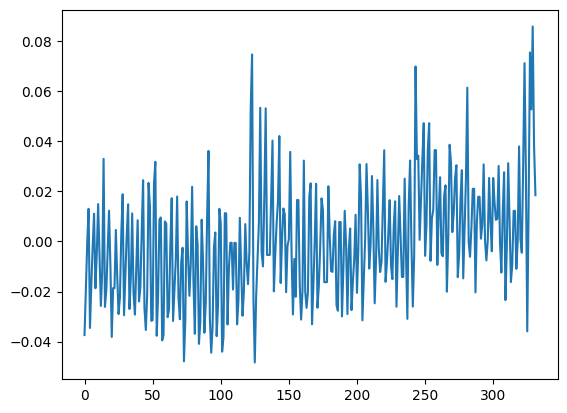

In [43]:
plt.plot(confounds_GS["trans_y"])

In [55]:
pearsonr(detrend(confounds_GS["rot_z"]), GS_detrend)

PearsonRResult(statistic=0.18462867255273946, pvalue=0.0007235035196860171)